In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation
import hvplot.pandas
import seaborn as sns


%matplotlib inline

In [2]:
# Load the environment variables from the .env file by calling the load_dotenv function
load_dotenv()

True

In [3]:
btc_df =  pd.read_csv(Path("./Resources/BTC_USD_2013-09-30_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

eth_df = pd.read_csv(Path("./Resources/ETH_USD_2015-08-08_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

xrp_df = pd.read_csv(Path("./Resources/XRP_USD_2018-05-31_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

ltc_df = pd.read_csv(Path("./Resources/LTC_USD_2018-05-31_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

sp500_df = pd.read_csv(Path("./Resources/SP500.csv"),
    index_col="Date", 
    dtype={
       "Closing Price (USD)":np.float64
    },
    parse_dates=True, 
    infer_datetime_format=True)

sp500_df.dtypes


Closing Price (USD)    float64
dtype: object

In [4]:
display(btc_df.tail() )
display(eth_df.head() )
display(xrp_df.head() )
display(ltc_df.head() )
display(sp500_df.head())
display(sp500_df.tail())

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-09,BTC,58102.191426,58966.915010,59249.141676,56494.915334
2021-05-10,BTC,55715.546651,58308.318048,59560.025459,53774.628243
2021-05-11,BTC,56573.555472,55899.752971,56956.075029,54571.693210
2021-05-12,BTC,52147.821187,56767.711063,58036.509777,51625.547849
2021-05-13,BTC,49764.132082,49596.778891,51448.798576,46294.720180


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2015-08-08,ETH,0.909046,1.749289,1.916540,0.794497
2015-08-09,ETH,0.692321,0.909046,0.909046,0.692321
2015-08-10,ETH,0.668067,0.692321,0.692321,0.654331
2015-08-11,ETH,0.850151,0.668067,1.148621,0.668067
2015-08-12,ETH,1.266023,0.850151,1.266023,0.850151


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,XRP,0.609705,0.616405,0.618404,0.607282
2018-06-01,XRP,0.617604,0.614872,0.621169,0.608681
2018-06-02,XRP,0.643043,0.624189,0.650921,0.618503
2018-06-03,XRP,0.667634,0.644291,0.677069,0.640769
2018-06-04,XRP,0.669680,0.690562,0.706326,0.643054


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,LTC,117.475053,118.974662,119.628628,117.006761
2018-06-01,LTC,119.934676,118.307052,120.452653,117.390816
2018-06-02,LTC,123.222694,120.171853,124.229394,118.542360
2018-06-03,LTC,125.365456,123.500674,127.920242,122.112908
2018-06-04,LTC,119.522003,124.869538,126.883812,118.303633


,Closing Price (USD)
Date,
2016-05-13,2046.61
2016-05-16,2066.66
2016-05-17,2047.21
2016-05-18,2047.63
2016-05-19,2040.04


,Closing Price (USD)
Date,
2021-05-07,4232.60
2021-05-10,4188.43
2021-05-11,4152.10
2021-05-12,4063.04
2021-05-13,4112.50


In [5]:
star_date_btc = btc_df.loc["2018-05-31" :]
star_date_btc

star_date_eth = eth_df.loc["2018-05-31" :]
star_date_eth 

star_date_xrp = xrp_df.loc["2018-05-31" :]
star_date_xrp

star_date_ltc = ltc_df.loc["2018-05-31" :]
star_date_ltc

start_date_sp500_df = sp500_df.loc["2018-05-31" :]

display(star_date_btc.head() )
display(star_date_eth.head() )
display(star_date_xrp.head() )
display(star_date_ltc.head() )
display(start_date_sp500_df.head())

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,BTC,7490.621250,7540.810522,7614.063908,7361.565000
2018-06-01,BTC,7518.333329,7494.065482,7599.180474,7393.287588
2018-06-02,BTC,7630.403388,7516.612569,7696.542926,7450.698017
2018-06-03,BTC,7716.145068,7638.232021,7774.829285,7600.263944
2018-06-04,BTC,7505.589277,7706.639829,7760.178308,7451.523947


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,ETH,570.865740,579.714110,583.906997,566.401273
2018-06-01,ETH,577.257364,576.075224,585.536316,562.263880
2018-06-02,ETH,591.381123,576.481510,597.747636,571.242485
2018-06-03,ETH,618.302767,589.862747,627.715453,589.354724
2018-06-04,ETH,591.549075,618.234340,625.133239,579.802136


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,XRP,0.609705,0.616405,0.618404,0.607282
2018-06-01,XRP,0.617604,0.614872,0.621169,0.608681
2018-06-02,XRP,0.643043,0.624189,0.650921,0.618503
2018-06-03,XRP,0.667634,0.644291,0.677069,0.640769
2018-06-04,XRP,0.669680,0.690562,0.706326,0.643054


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,LTC,117.475053,118.974662,119.628628,117.006761
2018-06-01,LTC,119.934676,118.307052,120.452653,117.390816
2018-06-02,LTC,123.222694,120.171853,124.229394,118.542360
2018-06-03,LTC,125.365456,123.500674,127.920242,122.112908
2018-06-04,LTC,119.522003,124.869538,126.883812,118.303633


,Closing Price (USD)
Date,
2018-05-31,2705.27
2018-06-01,2734.62
2018-06-04,2746.87
2018-06-05,2748.80
2018-06-06,2772.35


In [6]:
start_date_sp500_df['Currency'] = "SP500"
start_date_sp500_df = start_date_sp500_df.reindex(columns=['Currency', 'Closing Price (USD)'])
start_date_sp500_df.head()

C:\Users\torne\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Currency,Closing Price (USD)
Date,,
2018-05-31,SP500,2705.27
2018-06-01,SP500,2734.62
2018-06-04,SP500,2746.87
2018-06-05,SP500,2748.80
2018-06-06,SP500,2772.35


In [7]:
btc_closing_prices = star_date_btc.loc[:,["Currency","Closing Price (USD)"]]

eth_closing_prices = star_date_eth.loc[:,["Currency","Closing Price (USD)"]]

ltc_closing_prices = star_date_ltc.loc[:,["Currency","Closing Price (USD)"]]

xrp_closing_prices =  star_date_xrp.loc[:,["Currency","Closing Price (USD)"]]



crypto_currencies_closing = [btc_closing_prices, eth_closing_prices, ltc_closing_prices, xrp_closing_prices, start_date_sp500_df]
crypto_currencies_closing 
crypto_currencies_closing_df = pd.concat(crypto_currencies_closing) 
crypto_currencies_closing_df

,Currency,Closing Price (USD)
Date,,
2018-05-31,BTC,7490.621250
2018-06-01,BTC,7518.333329
2018-06-02,BTC,7630.403388
2018-06-03,BTC,7716.145068
2018-06-04,BTC,7505.589277
...,...,...
2021-05-07,SP500,4232.600000
2021-05-10,SP500,4188.430000
2021-05-11,SP500,4152.100000


In [8]:
pivot_crypto_currencies_closing_df = crypto_currencies_closing_df.pivot(columns="Currency")

pivot_crypto_currencies_closing_drop_df = pivot_crypto_currencies_closing_df.dropna()

In [9]:
pivot_crypto_currencies_closing_drop_df['Closing Price (USD)'].astype(float)
pivot_crypto_currencies_closing_drop_df.dtypes

                     Currency
Closing Price (USD)  BTC         float64
                     ETH         float64
                     LTC         float64
                     SP500       float64
                     XRP         float64
dtype: object

In [10]:
pivot_crypto_currencies_closing_drop_df.describe(include="all")

Closing Price (USD)                                                  
Currency                 BTC          ETH         LTC        SP500         XRP
count             744.000000   744.000000  744.000000   744.000000  744.000000
mean            13536.041607   461.812059   80.309239  3116.446895    0.367287
std             14206.852747   620.397370   56.759866   419.026612    0.237358
min              3212.207081    83.368456   22.864239  2237.400000    0.138613
25%              6478.807799   171.343026   46.414786  2817.850000    0.245836
50%              8758.926890   226.913026   58.858453  2978.570000    0.303275
75%             11267.469496   409.072095   88.159547  3348.620000    0.433335
max             63346.789035  4132.757546  371.689785  4232.600000    1.809823

In [11]:

pivot_crypto_currencies_closing_drop_df.columns

MultiIndex([('Closing Price (USD)',   'BTC'),
            ('Closing Price (USD)',   'ETH'),
            ('Closing Price (USD)',   'LTC'),
            ('Closing Price (USD)', 'SP500'),
            ('Closing Price (USD)',   'XRP')],
           names=[None, 'Currency'])

In [12]:
pivot_crypto_currencies_closing_drop_df['Closing Price (USD)'].hvplot(x='Date',
                                 xlabel="Date", 
                                 title = "Cryptocurrencies",
                                 width = 1000,height=500)


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [13]:
crypto_currencies_closing_df.hvplot(x='Date', groupby="Currency", xlabel="Date", title = "Cryptocurrencies", width = 1000,height=500)

:DynamicMap   [Currency]
   :Curve   [Date]   (Closing Price (USD))

In [14]:
pivot_crypto_currencies_closing_return_df = pivot_crypto_currencies_closing_drop_df.pct_change().dropna()
pivot_crypto_currencies_closing_return_df

Closing Price (USD)                                        
Currency                   BTC       ETH       LTC     SP500       XRP
Date                                                                  
2018-06-01            0.003700  0.011196  0.020937  0.010849  0.012955
2018-06-04           -0.001695  0.024758 -0.003441  0.004480  0.084320
2018-06-05            0.015801  0.027522  0.021391  0.000703  0.014023
2018-06-06            0.004510 -0.002714 -0.004864  0.008567 -0.008166
2018-06-07            0.003442 -0.004322  0.000044 -0.000714  0.005555
...                        ...       ...       ...       ...       ...
2021-05-07            0.009248 -0.027246 -0.026497  0.007373 -0.054635
2021-05-10           -0.024368  0.160644  0.096708 -0.010436 -0.086326
2021-05-11            0.015400  0.033470  0.012491 -0.008674  0.026663
2021-05-12           -0.078230 -0.013501 -0.092907 -0.021449 -0.066699
2021-05-13           -0.045710 -0.076006 -0.073251  0.012173 -0.012137

[743 rows x 5 columns]

<AxesSubplot:title={'center':'Daily return'}, xlabel='Date'>

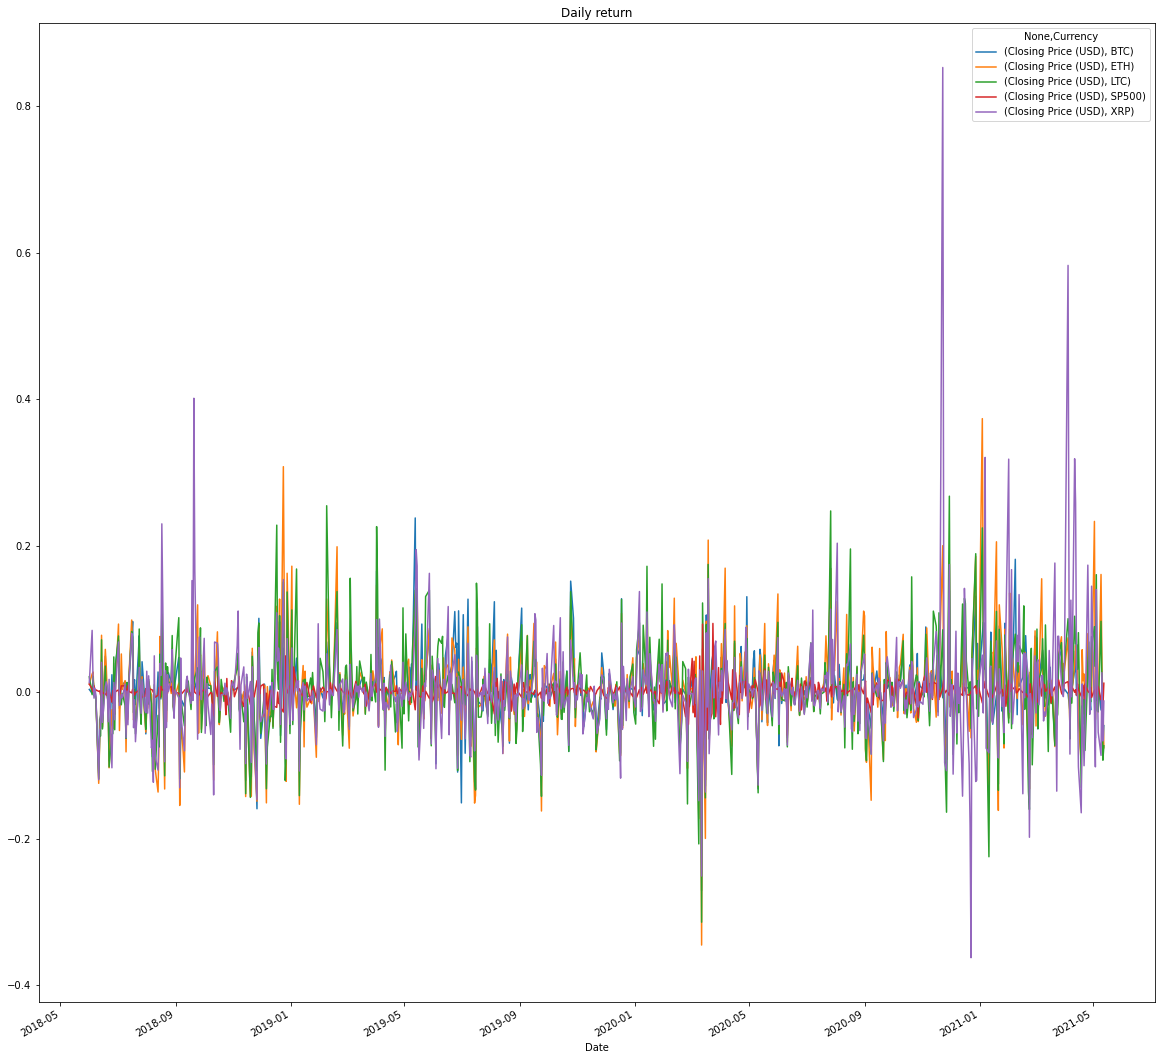

In [15]:
pivot_crypto_currencies_closing_return_df.plot(figsize = (20,20), title = "Daily return")

In [16]:

pivot_crypto_currencies_closing_return_df ['Closing Price (USD)'].hvplot.box(xlabel="Date", title = "Cryptocurrencies Daily Returns volatily", width = 1000, height=500)


:BoxWhisker   [Variable]   (value)

In [17]:
#Cumulative returns

cumulative_returns_df = (1 + pivot_crypto_currencies_closing_return_df).cumprod().dropna() 

cumulative_returns_df.head()


Closing Price (USD)                                        
Currency                   BTC       ETH       LTC     SP500       XRP
Date                                                                  
2018-06-01            1.003700  1.011196  1.020937  1.010849  1.012955
2018-06-04            1.001998  1.036232  1.017425  1.015377  1.098367
2018-06-05            1.017831  1.064750  1.039188  1.016091  1.113770
2018-06-06            1.022421  1.061861  1.034133  1.024796  1.104675
2018-06-07            1.025940  1.057271  1.034179  1.024064  1.110812

In [18]:
cumulative_returns_df['Closing Price (USD)'].hvplot(title="Cumulative Returns Cryptocurrencies", width = 1000, height=500)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [19]:
pivot_crypto_currencies_closing_return_df.mean()

                     Currency
Closing Price (USD)  BTC         0.003550
                     ETH         0.004285
                     LTC         0.003126
                     SP500       0.000671
                     XRP         0.003426
dtype: float64

In [20]:
pivot_crypto_currencies_closing_return_df.std()

                     Currency
Closing Price (USD)  BTC         0.044661
                     ETH         0.059263
                     LTC         0.060329
                     SP500       0.014611
                     XRP         0.072538
dtype: float64

In [21]:
#Correlation
correlation_cryptocurrencies = pivot_crypto_currencies_closing_return_df.corr()
correlation_cryptocurrencies

Closing Price (USD)                      \
Currency                                     BTC       ETH       LTC   
                    Currency                                           
Closing Price (USD) BTC                 1.000000  0.763228  0.781240   
                    ETH                 0.763228  1.000000  0.813104   
                    LTC                 0.781240  0.813104  1.000000   
                    SP500               0.185274  0.212004  0.189586   
                    XRP                 0.460920  0.566911  0.534877   

                                                  
Currency                         SP500       XRP  
                    Currency                      
Closing Price (USD) BTC       0.185274  0.460920  
                    ETH       0.212004  0.566911  
                    LTC       0.189586  0.534877  
                    SP500     1.000000  0.176517  
                    XRP       0.176517  1.000000

<AxesSubplot:xlabel='None-Currency', ylabel='None-Currency'>

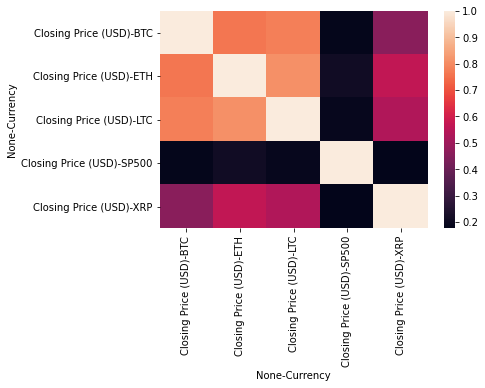

In [22]:
#Visualize the correlation
#correlation_cryptocurrencies["Closing Price (USD)"].hvplot.heatmap( x= "Currency", y="Currency", width = 1000, height=500)
sns.heatmap(correlation_cryptocurrencies)